In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
plt.rc('axes', labelsize=15)

plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["legend.frameon"]=False
plt.rcParams["legend.labelspacing"]=0.1
plt.rcParams["legend.borderaxespad"]=0.2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.signal import find_peaks
import matplotlib.patches as mpatches
from scipy.stats import pearsonr
from scipy import stats
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

# Figure 3, panels b and c 

Pearsons correlation for 1.0 A: -0.014
Pearsons correlation for 0.5 A: 0.210
Pearsons correlation for 0.3 A: 0.496


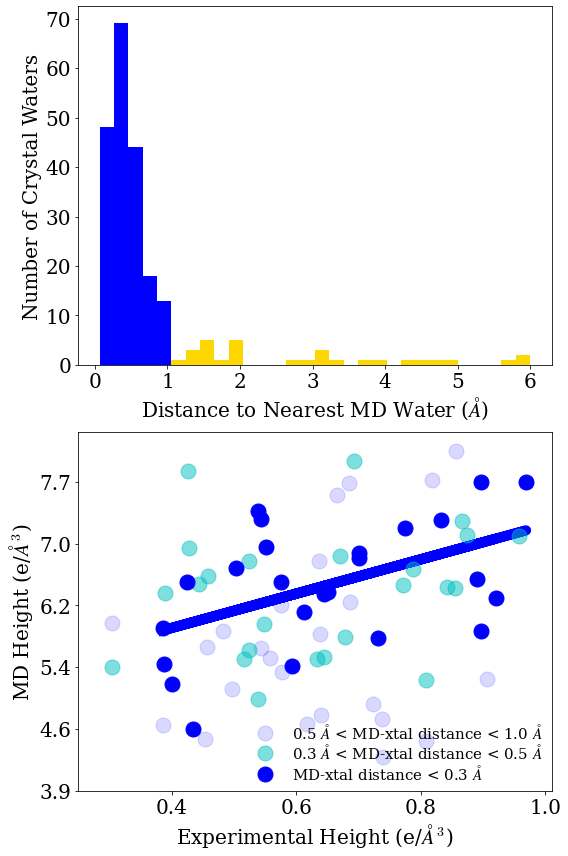

In [11]:
###Load files###
df_ = pd.read_pickle('files/Matches_XTALwater_OEC_chain1_2.69_rms_july_13') 
asmit = pd.read_csv('files/0F_2FoFc_peakht.dat') #Load asmit experimental peakheights

###Rename headers so merging is easier###
df2 = df_.rename({'Thresh': 'MD Height (e/A^3)', 'Dist': 'Distance(A)'}, axis=1)  # new method
df2.sort_values(by=['Distance(A)'])
df3 = df2[df2['Chain']== 'G']
df5 = df3.sort_values('XTAL ID')

asmit['XTAL ID'] = asmit['XTAL ID'] - 5000
asmit_overlap = asmit[asmit['XTAL ID'].isin(df5['XTAL ID'])]


###Merge###
merged =(pd.merge(asmit_overlap, df5, on='XTAL ID'))
merged = merged.sort_values(by=['Distance(A)'])

###Outer shell### 
merged2 = merged[(merged['Distance(A)'] < 1)& (merged['Distance(A)'] > 0.5) ]
merged_new_1 = merged2

###Center shell### 

merged2 = merged[(merged['Distance(A)'] < 0.5) & (merged['Distance(A)'] > 0.3)]
merged_new_05 = merged2

###Inner shell### 

merged2 = merged[merged['Distance(A)'] < 0.3]
merged_new_03 = merged2


###Plot### 
fig, axs = plt.subplots(2)
n, bins, patches= axs[0].hist(df_['Dist'], bins=30, color='blue')
matplotlib.rcParams['figure.figsize'] = (8,12)

for x in range(5,30):
    patches[x].set_fc('gold')
axs[0].set_xlabel('Distance to Nearest MD Water ('r'$\AA$)', fontsize=20)
axs[0].set_ylabel('Number of Crystal Waters', fontsize=20)


a, b = np.polyfit(merged_new_03[' Exp Height'],  merged_new_03['MD Height (e/A^3)'], 1)
corr1, _ = pearsonr(merged_new_1[' Exp Height'], merged_new_1['MD Height (e/A^3)'])
corr05, _ = pearsonr(merged_new_05[' Exp Height'], merged_new_05['MD Height (e/A^3)'])
corr03, _ = pearsonr(merged_new_03[' Exp Height'], merged_new_03['MD Height (e/A^3)'])

axs[1].plot(merged_new_03[' Exp Height'], a*merged_new_03[' Exp Height'] + b, color='blue', linewidth=10)
axs[1].plot(merged_new_1[' Exp Height'], merged_new_1['MD Height (e/A^3)'],'bo', alpha = 0.15, markersize=15, label=r'0.5 $\AA$ < MD-xtal distance < 1.0 $\AA$')
axs[1].plot(merged_new_05[' Exp Height'], merged_new_05['MD Height (e/A^3)'],'co', alpha = 0.5, markersize=15, label=r'0.3 $\AA$ < MD-xtal distance < 0.5 $\AA$')
axs[1].plot(merged_new_03[' Exp Height'], merged_new_03['MD Height (e/A^3)'],'bo', markersize=15, label=r'MD-xtal distance < 0.3 $\AA$')
axs[1].set_ylabel(r'MD Height (e/$\AA^{3}$)', fontsize=20)
axs[1].set_xlabel(r'Experimental Height (e/$\AA^{3}$)', fontsize=20)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

print(r'Pearsons correlation for 1.0 A: %.3f' % corr1)
print('Pearsons correlation for 0.5 A: %.3f' % corr05)
print('Pearsons correlation for 0.3 A: %.3f' % corr03)


axs[1].legend(fontsize=15, loc='lower right')
plt.xlim(0.25, 1.01)
plt.ylim(5, 11)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

axs[0].tick_params(labelsize=20)
axs[1].tick_params(labelsize=20)

axs[1].set_ylim(5,10.8)

###Converting axis from sigma to to e/A^3###
axs[1].set_yticklabels( [3.9, 4.6 ,5.4,6.2,7.0,7.7])

plt.tight_layout()
plt.savefig('Fig3.png', formst='png', dpi=300)

# SI 3

Mean in channel (sigma) =  7.4407446808510604
Mean outside channel (sigma)=  4.977221801665393
Second hist area normalized to 0.9999999999999999
Second hist area normalized to 1.0


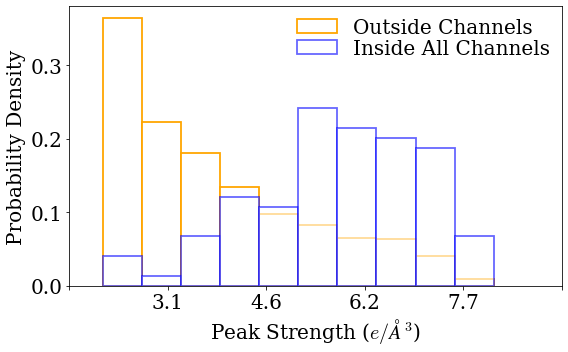

In [3]:
### LOAD FILES ###
outsidechannel=pd.concat([pd.read_pickle('files/Matches_XTALwater_Rand_%d' %247), pd.read_pickle('files/Matches_XTALwater_Rand_%d' %1685),pd.read_pickle('files/Matches_XTALwater_Rand_%d' %962),pd.read_pickle('files/Matches_XTALwater_Rand_%d' %1566),pd.read_pickle('files/Matches_XTALwater_Rand_%d' %536),pd.read_pickle('files/Matches_XTALwater_Rand_%d' %218)])
outsidechannel=outsidechannel.drop_duplicates('MD ID').reset_index(drop=True)
result_outside=outsidechannel
justchannel=pd.concat([pd.read_pickle('files/Matches_XTALwater_O1_chain1'), pd.read_pickle('files/Matches_XTALwater_O4_chain1'),pd.read_pickle('files/Matches_XTALwater_Cl_chain1')]).drop_duplicates('MD ID').reset_index(drop=True)
result_inside = justchannel

###########

plt.figure(figsize=[8,5])
n=10
x = result_outside['Thresh']
weights_1 = np.ones_like(x)*n/(np.max(x) - np.min(x))/len(x)
y = result_inside['Thresh']
weights_2 = np.ones_like(y)*n/(np.max(y) - np.min(y))/len(y)
bins2=np.histogram(np.hstack((x,y)), bins=n)[1]

values1, bins1, _ =plt.hist(result_outside['Thresh'],bins2,color='white', edgecolor='orange', density=True,linewidth=1.8, label='Outside Channels')
values3, bins3, _ = plt.hist(result_inside['Thresh'],bins2, color='white', alpha = 0.6, edgecolor='blue',  density=True, linewidth=1.8, label='Inside All Channels')

print('Mean in channel (sigma) = ', np.mean(result_inside['Thresh']))
print('Mean outside channel (sigma)= ', np.mean(result_outside['Thresh']))

print('Second hist area normalized to', sum(np.diff(bins1)*values1))

print('Second hist area normalized to', sum(np.diff(bins3)*values3))

plt.xlabel('Peak Strength ('r'$ e / \AA^3$)', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
plt.ylim(0,0.38)
plt.legend(loc='upper right', fontsize=20)
plt.tick_params(labelsize=20)
tick_values, tick_labels = plt.xticks()


plt.xticks(tick_values, ['', 3.1, 4.6, 6.2, 7.7])
# plt.xlim(tick_values[1] - 1,tick_values[-1])

plt.tight_layout()
plt.savefig('files/SI_3.png', dpi=300)


plt.show()

In [4]:
O1 = [26,27,28,29,30,31,32,39,35, 151, 33, 76, 34, 77, 38, 37, 36, 101, 102, 103, 104, 105, 106, 107,109]
O4 = [19,20,48,49,50,51,52,53, 71,72,73]
Cl = [25, 23, 24, 62, 61, 22, 21, 40, 41, 42, 150, 119, 117, 121, 122, 129, 145, 125, 126, 59, 60, 66, 67, 68, 69, 70]

In [5]:
bins =20
O1_m = df5[df5['XTAL ID'].isin(O1)]
O4_m = df5[df5['XTAL ID'].isin(O4)]
Cl_m = df5[df5['XTAL ID'].isin(Cl)]

O1 fraction of mobile waters:
0.6956521739130435
O4 fraction of mobile waters:
0.6363636363636364
Cl fraction of mobile waters:
0.4583333333333333


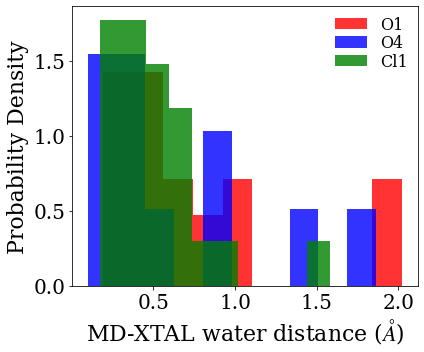

In [6]:
#Look at percentage of mobile waters based on binary classification! 
print('O1 fraction of mobile waters:')
print((len(O1_m[O1_m['MD Height (e/A^3)'] <np.percentile(df_['Thresh'], 50)]) / len(O1_m)))

print('O4 fraction of mobile waters:')
print((len(O4_m[O4_m['MD Height (e/A^3)'] <np.percentile(df_['Thresh'], 50)]) / len(O4_m)))

print('Cl fraction of mobile waters:')
print((len(Cl_m[Cl_m['MD Height (e/A^3)'] <np.percentile(df_['Thresh'], 50)]) / len(Cl_m)))

plt.figure( figsize=[6,5])

plt.hist(O1_m['Distance(A)'], color='red',alpha=0.8,density=True, label='O1')
plt.hist(O4_m['Distance(A)'], color='blue', alpha=0.8,density=True,label='O4')
plt.hist(Cl_m['Distance(A)'], color='green', alpha=0.8,density=True, label='Cl1')
plt.xlabel(r'MD-XTAL water distance ($\AA$)', fontsize=22)

plt.ylabel('Probability Density',fontsize=22)
plt.tick_params(labelsize=20)

plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig('SI_11.png', dpi=300)

In [7]:
print('average O1 channel height = %0.2f' %np.mean(O1_m['MD Height (e/A^3)']))

print('average Cl channel height = %0.2f' %np.mean(Cl_m['MD Height (e/A^3)']))

print('average O4 channel height = %0.2f' %np.mean(O4_m['MD Height (e/A^3)']))

print('****')

print('average O1 channel distance = %0.2f' %np.mean(O1_m['Distance(A)']))

print('average Cl channel distance = %0.2f' %np.mean(Cl_m['Distance(A)']))

print('average O4 channel distance = %0.2f' %np.mean(O4_m['Distance(A)']))

average O1 channel height = 7.54
average Cl channel height = 7.93
average O4 channel height = 7.36
****
average O1 channel distance = 0.72
average Cl channel distance = 0.52
average O4 channel distance = 0.67


In [8]:
master_O_O_array = np.load('files/O_O_master_array.npy',allow_pickle=True)
master_O_H_array = np.load('files/O_H_master_array.npy',allow_pickle=True )

***For true O-H distance***
33rd percentile =  2.356893359485529
66th percentile =  2.6438074852130424
99th percentile =  2.981742003385481
***For true O-O distance***
33rd percentile =  2.7675053748818583
66th percentile =  2.9269112752250144
99th percentile =  3.402806782642827


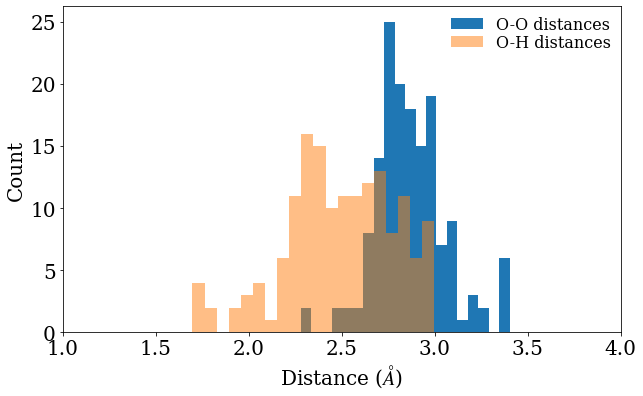

In [9]:

O_O_flat =master_O_O_array
O_H_flat = master_O_H_array
plt.figure(figsize=[10,6])
plt.hist(O_O_flat,bins=20, label='O-O distances')
plt.hist(O_H_flat,bins=20, alpha=0.5, label='O-H distances')
plt.legend(fontsize=20)
plt.xlabel(r'Distance ($\AA$)',fontsize=20)
plt.xlim(1,4)
plt.tick_params(labelsize=20)

plt.legend(fontsize=16)
plt.ylabel('Count',fontsize=20)
plt.savefig('SI_14.png', dpi=300)
print('***For true O-H distance***')
print('33rd percentile = ', np.percentile(O_H_flat, 33))
print('66th percentile = ', np.percentile(O_H_flat, 66))
print('99th percentile = ', np.percentile(O_H_flat, 99))

print('***For true O-O distance***')
print('33rd percentile = ', np.percentile(O_O_flat, 33))
print('66th percentile = ', np.percentile(O_O_flat, 66))
print('99th percentile = ', np.percentile(O_O_flat, 99))

plt.savefig('O_O.png', dpi=300)

# For peak height breakdown and percentils 

In [10]:
print('***Threshold percentile breakdown***')
print('33rd percentile = ', np.percentile(df_['Thresh'], 33))
print('66th percentile = ', np.percentile(df_['Thresh'], 66))
print('99th percentile = ', np.percentile(df_['Thresh'], 99))
print('avg peak height =', np.mean(df_['Thresh']))


***Threshold percentile breakdown***
33rd percentile =  7.1392999999999995
66th percentile =  8.51
99th percentile =  10.466399999999998
avg peak height = 7.7727927927927905



# 7.139 sigma -> 5.52 e/A^3
# 8.51 sigma -> 6.58 e/A^3
# 10.466 sigma -> 8.09 e/A^3

# 7.77 sigma -> 6 e/A^3